In [1]:
#importing Libraries
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
api = KaggleApi()
api.authenticate()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
import geopandas as gpd
import plotly.express as px
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
import plotly.graph_objects as go

api.dataset_download_files('sudalairajkumar/covid19-in-india')
from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")
zf = ZipFile('covid19-in-india.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [2]:
df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

#importing tests dataset
tests = pd.read_csv('StatewiseTestingDetails.csv' )
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

In [3]:
from datetime import date
import datetime
#current date
today = df[df.date == max(df.date)]

In [4]:
today.head()

,date,state,cured,deaths,confirmed
16814,2021-07-07,Andaman and Nicobar Islands,7343,128,7487
16815,2021-07-07,Andhra Pradesh,1861937,12898,1908065
16816,2021-07-07,Arunachal Pradesh,34525,181,37879
16817,2021-07-07,Assam,493306,4717,522267
16818,2021-07-07,Bihar,711913,9612,722746


In [5]:
gdf = gpd.read_file('india-states/Igismap/Indian_States.shp')
#renaming state names
gdf['st_nm'].replace({"Andaman & Nicobar Island": "Andaman and Nicobar Islands",
                      "Arunanchal Pradesh": "Arunachal Pradesh",
                      'Dadara & Nagar Havelli':'Dadra and Nagar Haveli and Daman and Diu',
                      'Jammu & Kashmir':'Jammu and Kashmir',
                      'NCT of Delhi':'Delhi'
                     }, inplace=True)
merged = gdf.merge(today ,  left_on='st_nm', right_on='state')
merged.state.replace({"Andaman and Nicobar Islands" : "A & N",
                      'Dadra and Nagar Haveli and Daman and Diu' : 'Daman & Diu',
                      'Jammu and Kashmir' : 'J & K'
                      }, inplace=True)


In [6]:
merged.head()

,st_nm,geometry,date,state,cured,deaths,confirmed
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",2021-07-07,A & N,7343,128,7487
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",2021-07-07,Arunachal Pradesh,34525,181,37879
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2021-07-07,Assam,493306,4717,522267
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2021-07-07,Bihar,711913,9612,722746
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",2021-07-07,Chandigarh,60837,809,61752


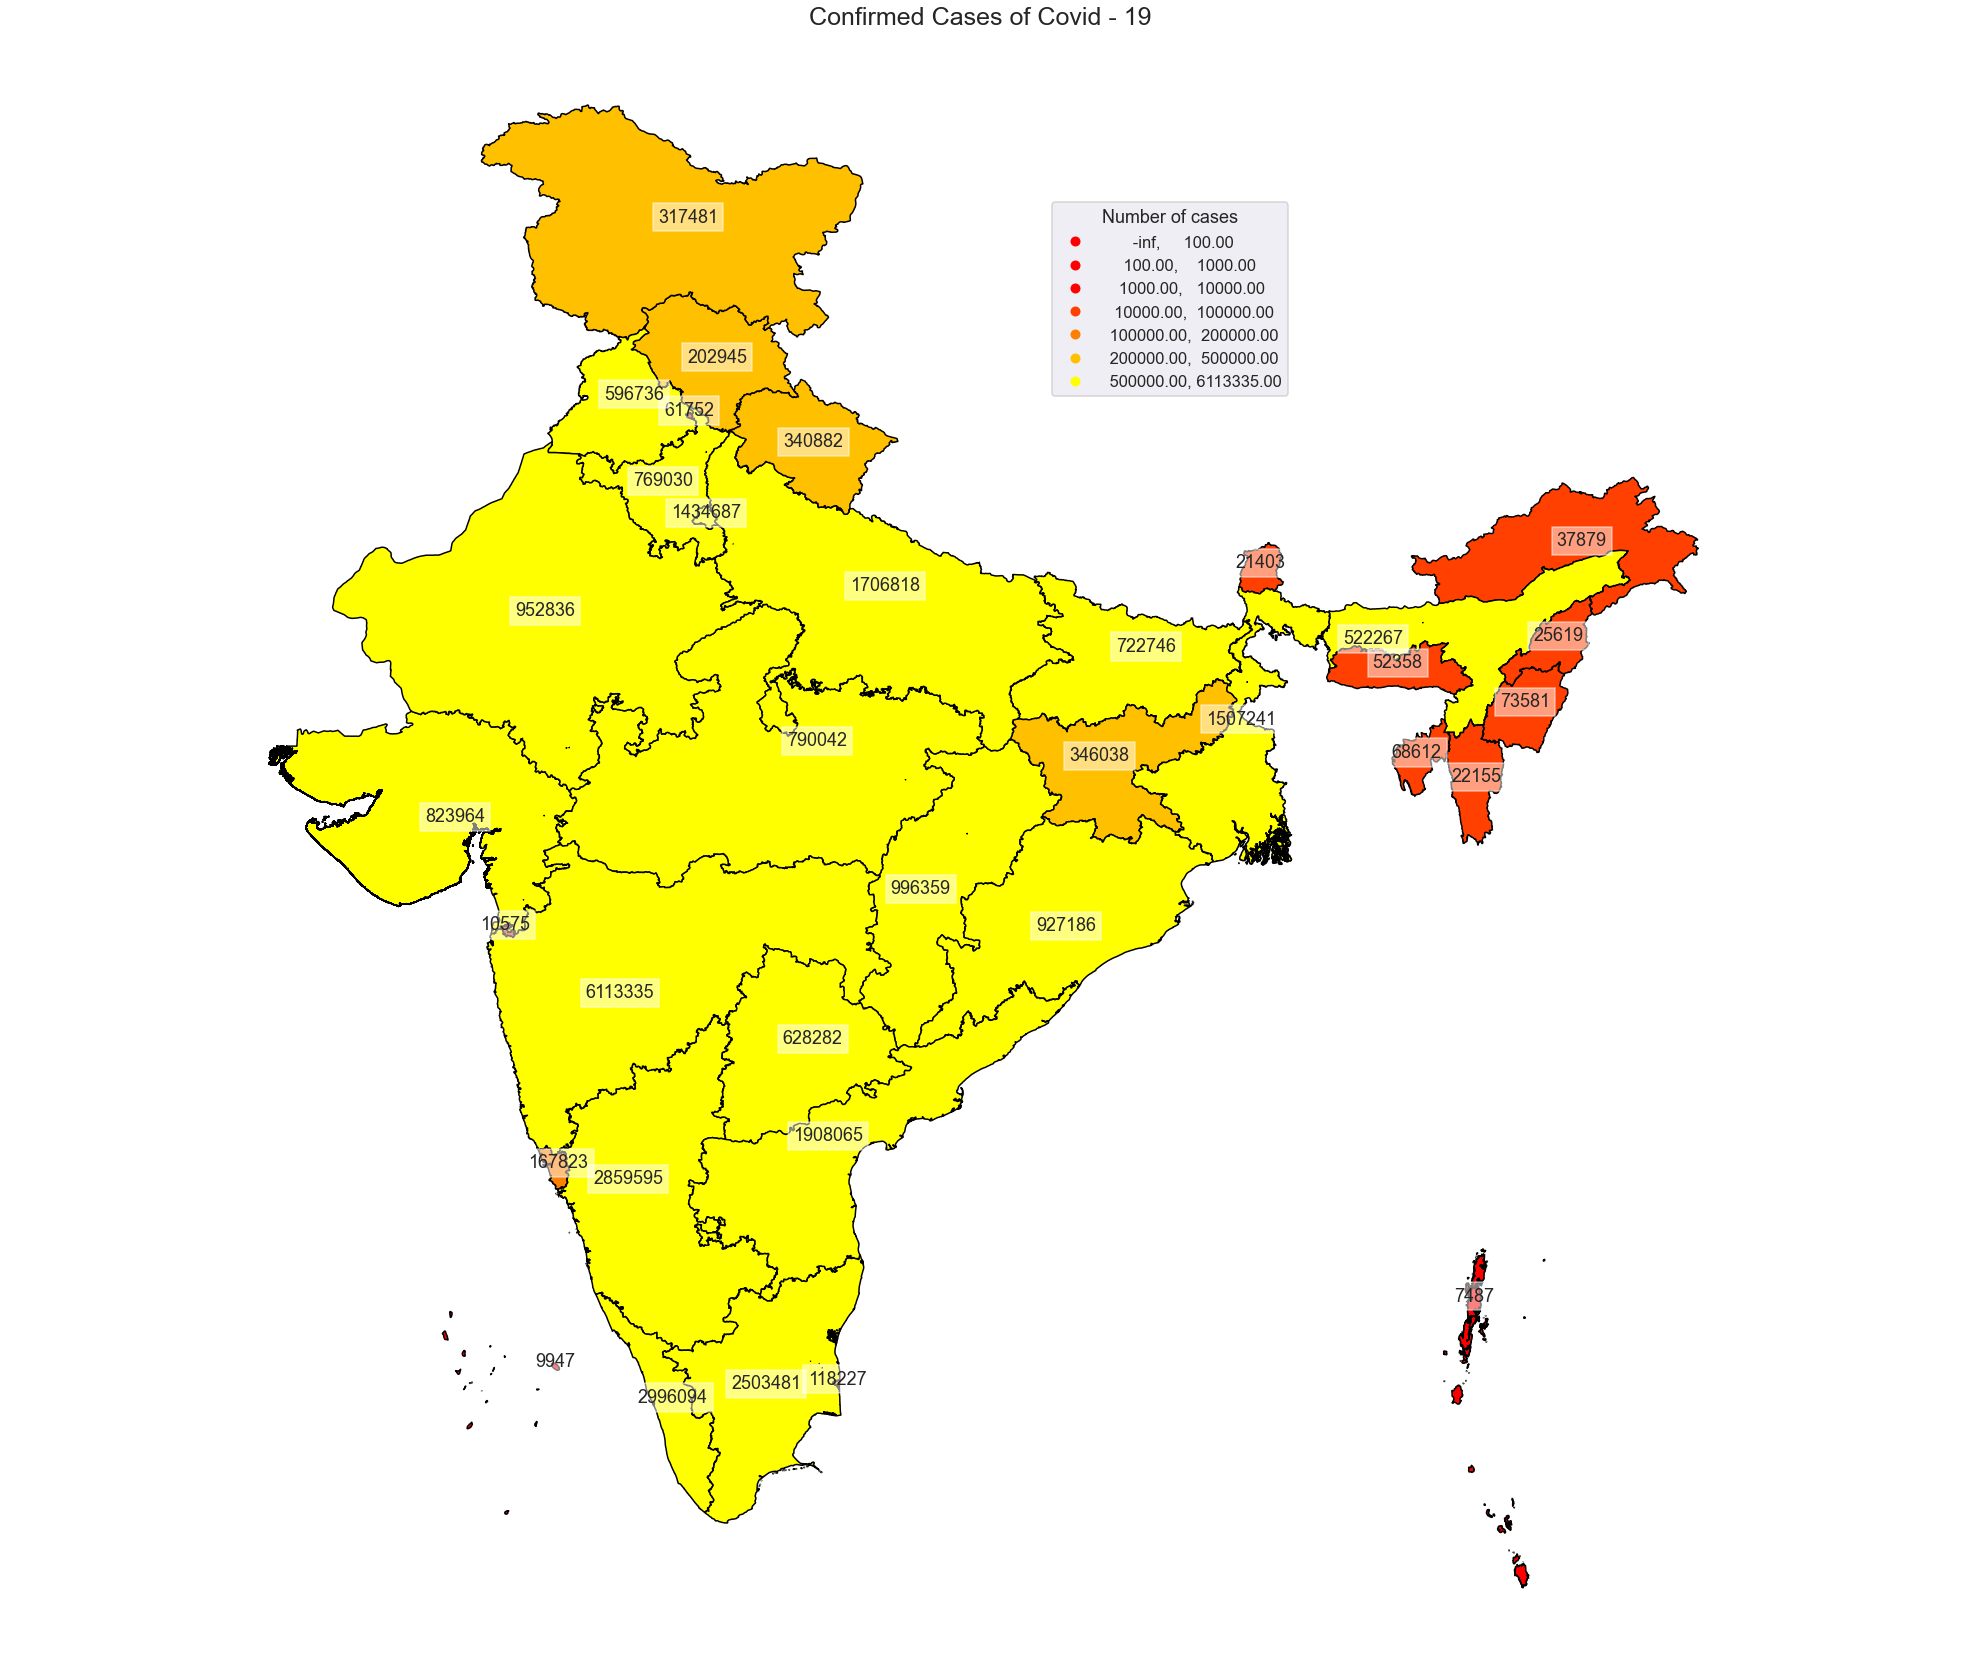

In [7]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]


sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'autumn'
figsize = (35, 30)
ax = merged.plot(column= 'confirmed', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,100000,200000,500000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['confirmed'], 
           horizontalalignment='center', bbox={'facecolor': 'white', 
                                               'alpha':0.5, 'pad': 5, 'edgecolor':'white'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of cases')
ax.set_title("Confirmed Cases of Covid - 19 ", size = 25)


#a = ax.text(65, 35, 'Total Cases \n 529,577',
           # fontsize=25,
           # )


ax.set_axis_off()
plt.axis('equal')
plt.show()

In [8]:
merged['coords'].head()

0    (92.83153129257889, 12.611584970470062)
1    (95.03199805598612, 28.055114856615404)
2    (90.76265036100918, 26.052225148671738)
3    (86.12533485112044, 25.902658098342613)
4    (76.78051175496091, 30.730184003289168)
Name: coords, dtype: object

In [9]:
merged.head()

,st_nm,geometry,date,state,cured,deaths,confirmed,coords
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",2021-07-07,A & N,7343,128,7487,"(92.83153129257889, 12.611584970470062)"
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",2021-07-07,Arunachal Pradesh,34525,181,37879,"(95.03199805598612, 28.055114856615404)"
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2021-07-07,Assam,493306,4717,522267,"(90.76265036100918, 26.052225148671738)"
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2021-07-07,Bihar,711913,9612,722746,"(86.12533485112044, 25.902658098342613)"
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",2021-07-07,Chandigarh,60837,809,61752,"(76.78051175496091, 30.730184003289168)"


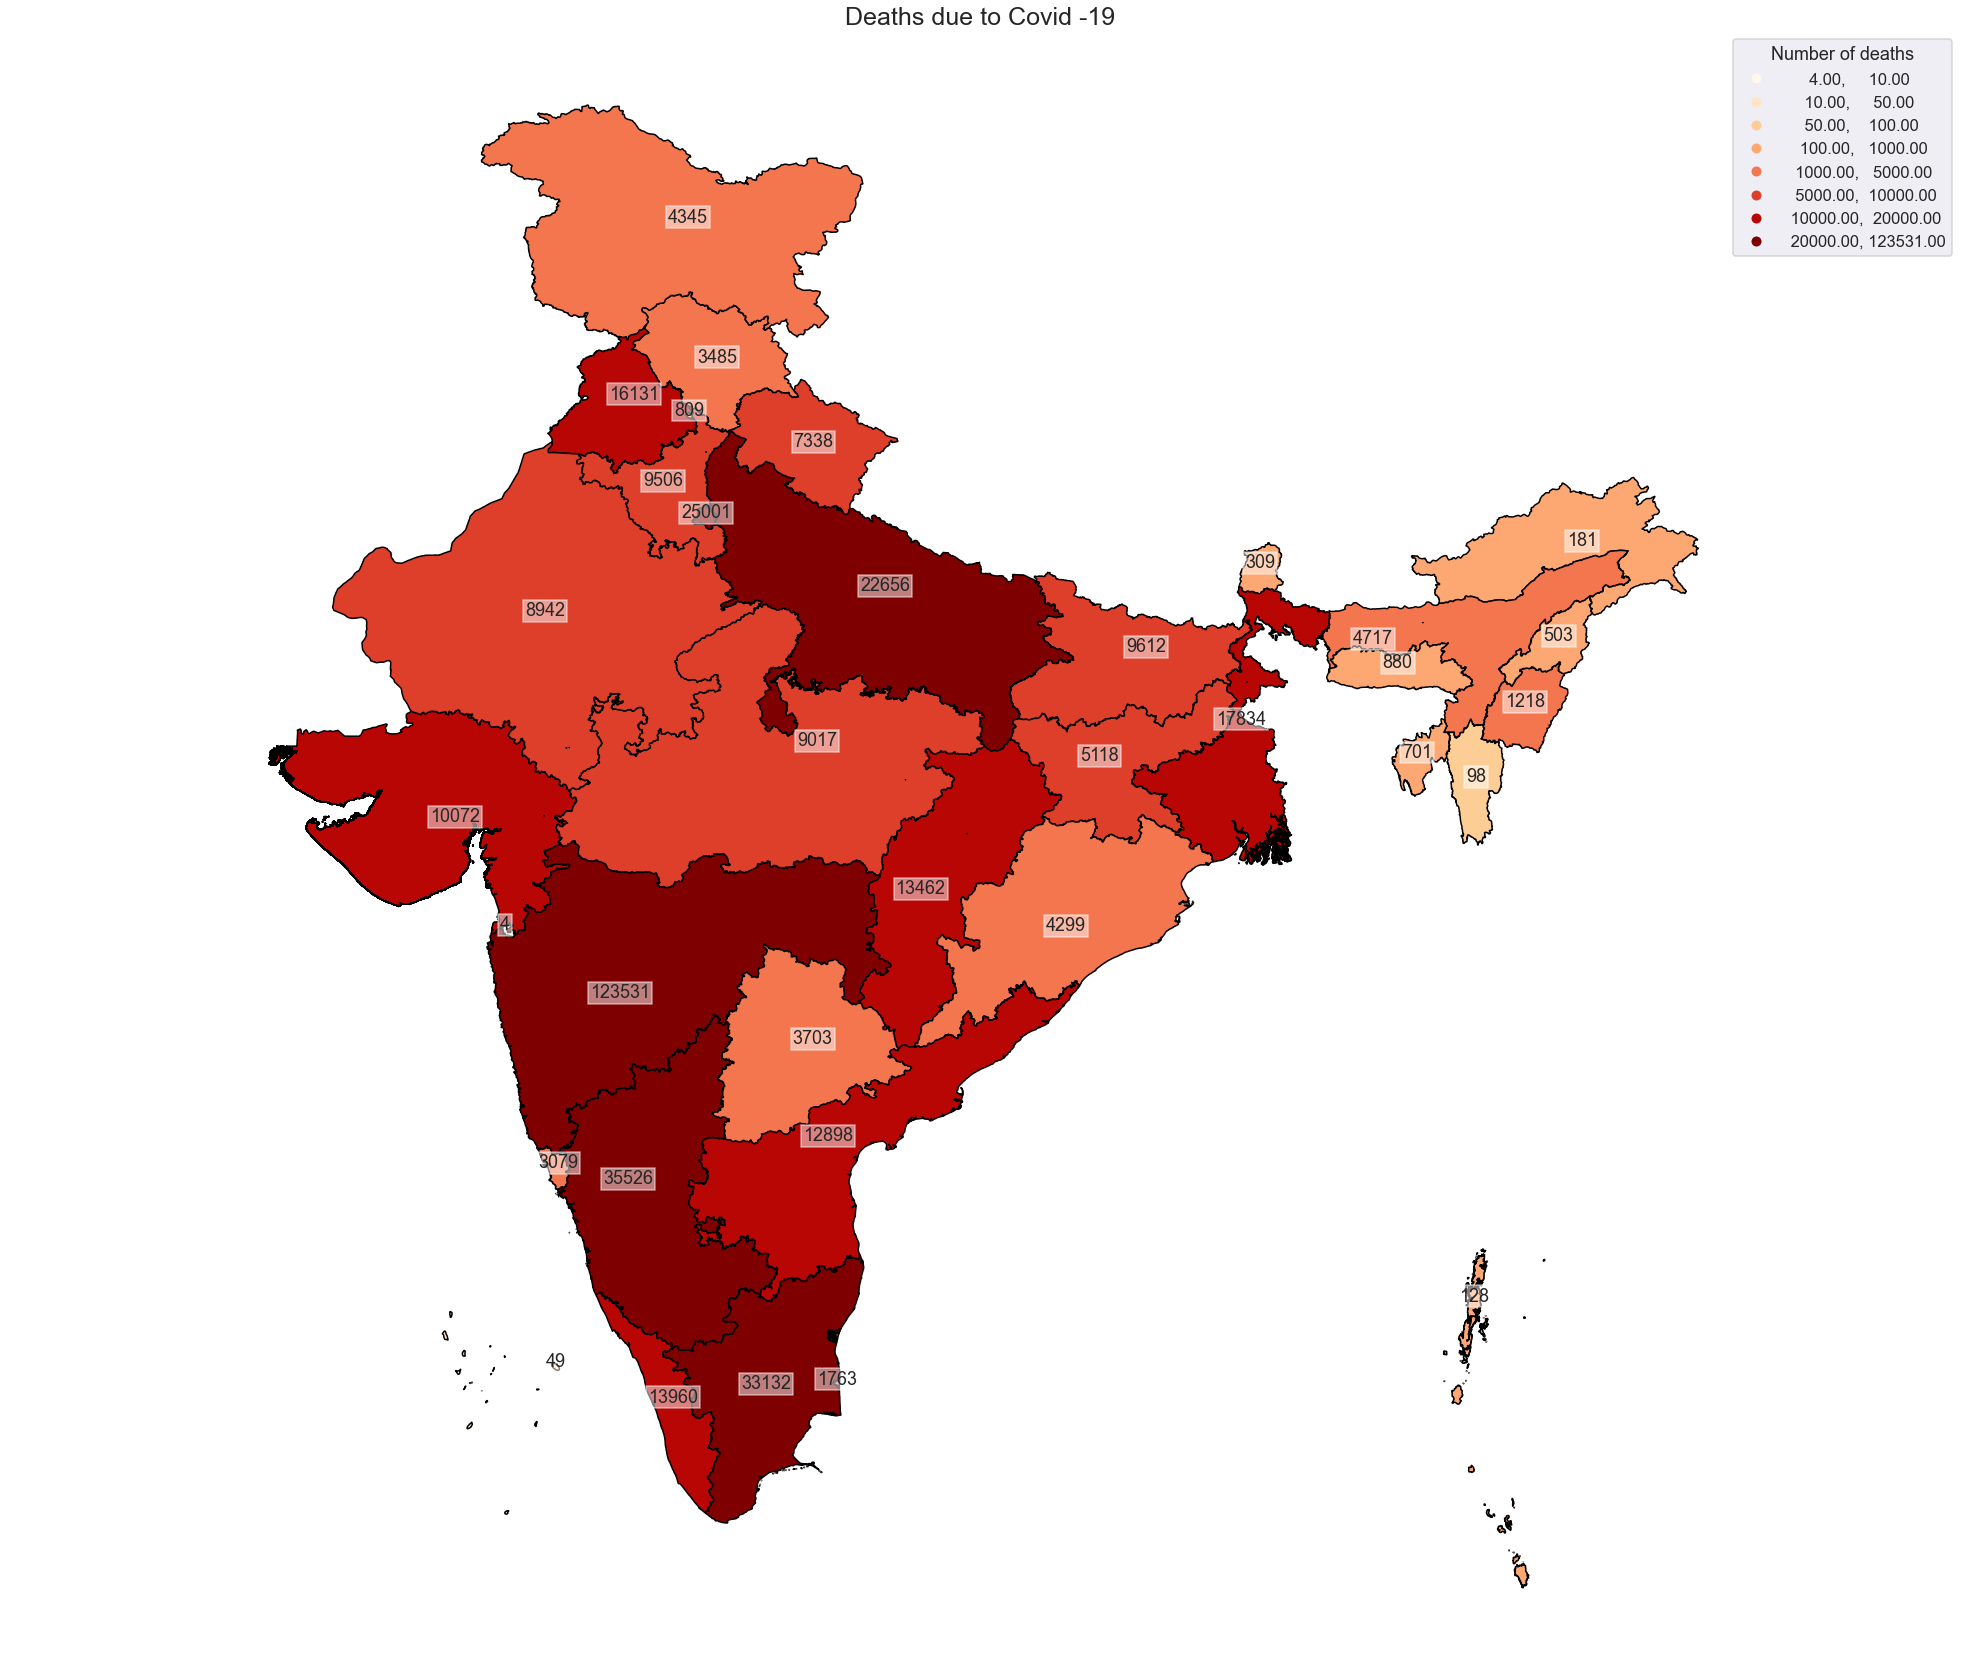

In [10]:
sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'OrRd'
figsize = (35, 30)
ax = merged.dropna().plot(column= 'deaths', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[10,50,100,1000,5000,10000,20000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['deaths'], 
           horizontalalignment='center', bbox={'facecolor': 'white', 
                                               'alpha':0.5, 'pad': 2, 'edgecolor':'white'})

#ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of deaths')
ax.set_title("Deaths due to Covid -19 ", size = 25)
#a = ax.text(65, 35, 'Total Deaths \n 16,103',
            #fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

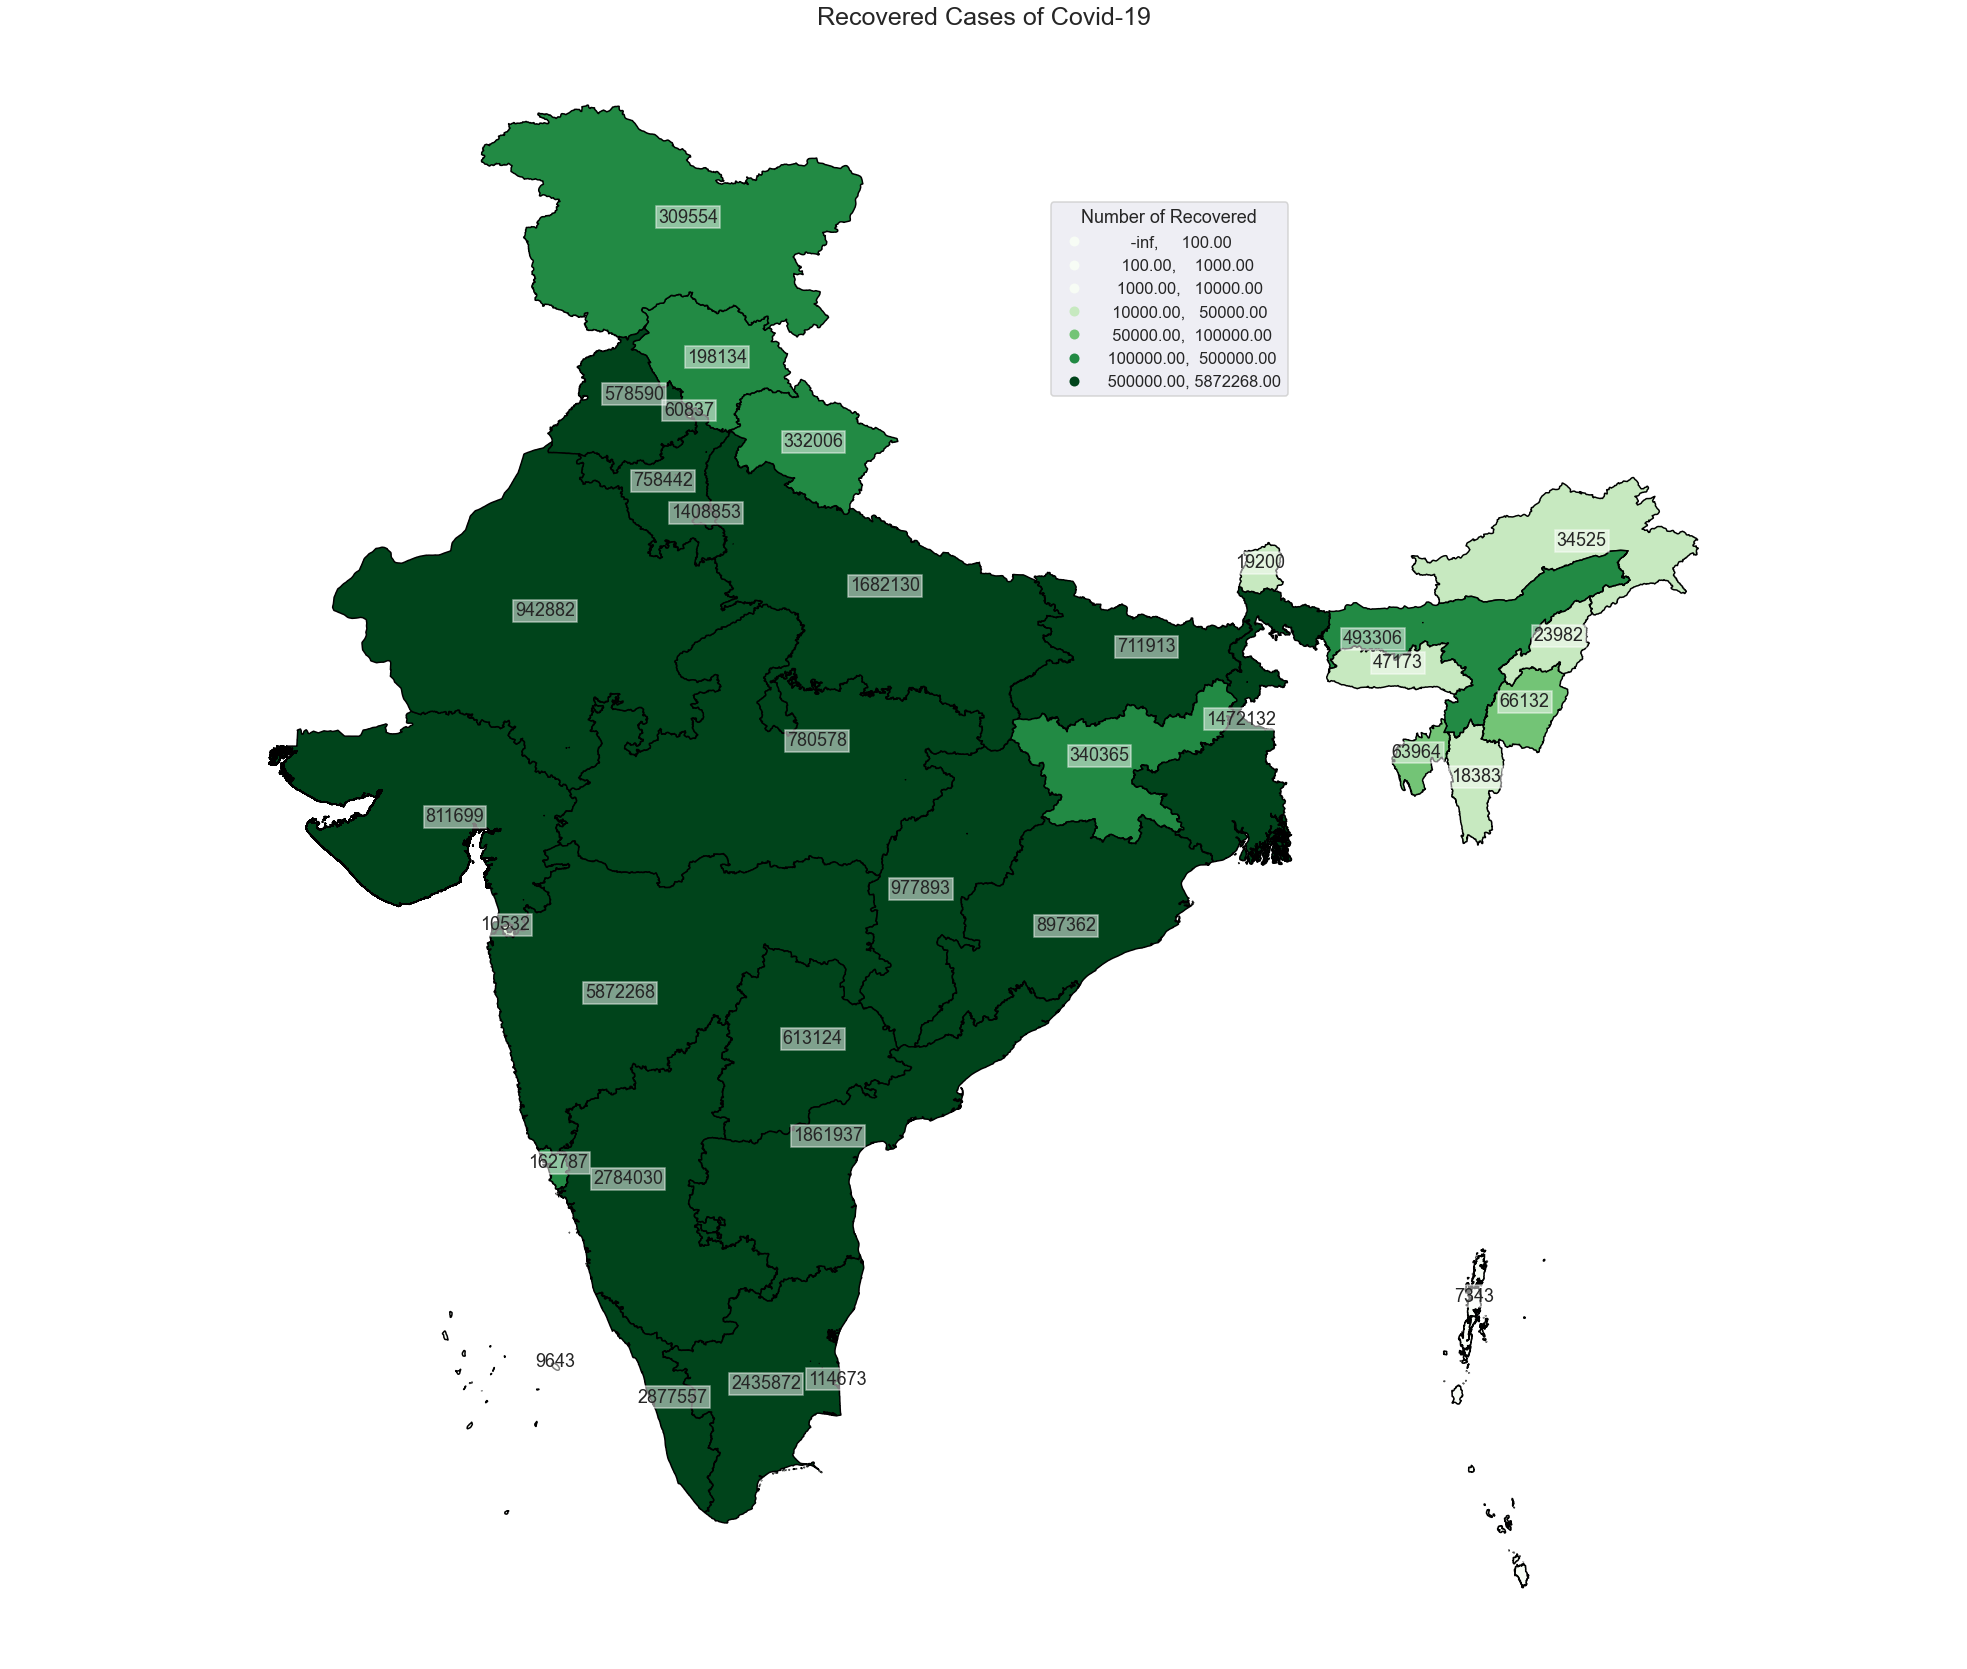

In [11]:
sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'Greens'
figsize = (35, 30)
ax = merged.dropna().plot(column= 'cured', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000,500000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['cured'], 
           horizontalalignment='center', bbox={'facecolor': 'white', 
                                               'alpha':0.5, 'pad': 2, 'edgecolor':'white'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of Recovered')
ax.set_title("Recovered Cases of Covid-19", size = 25)

#a = ax.text(65, 35, 'Total Recovered \n 310,146',
           # fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

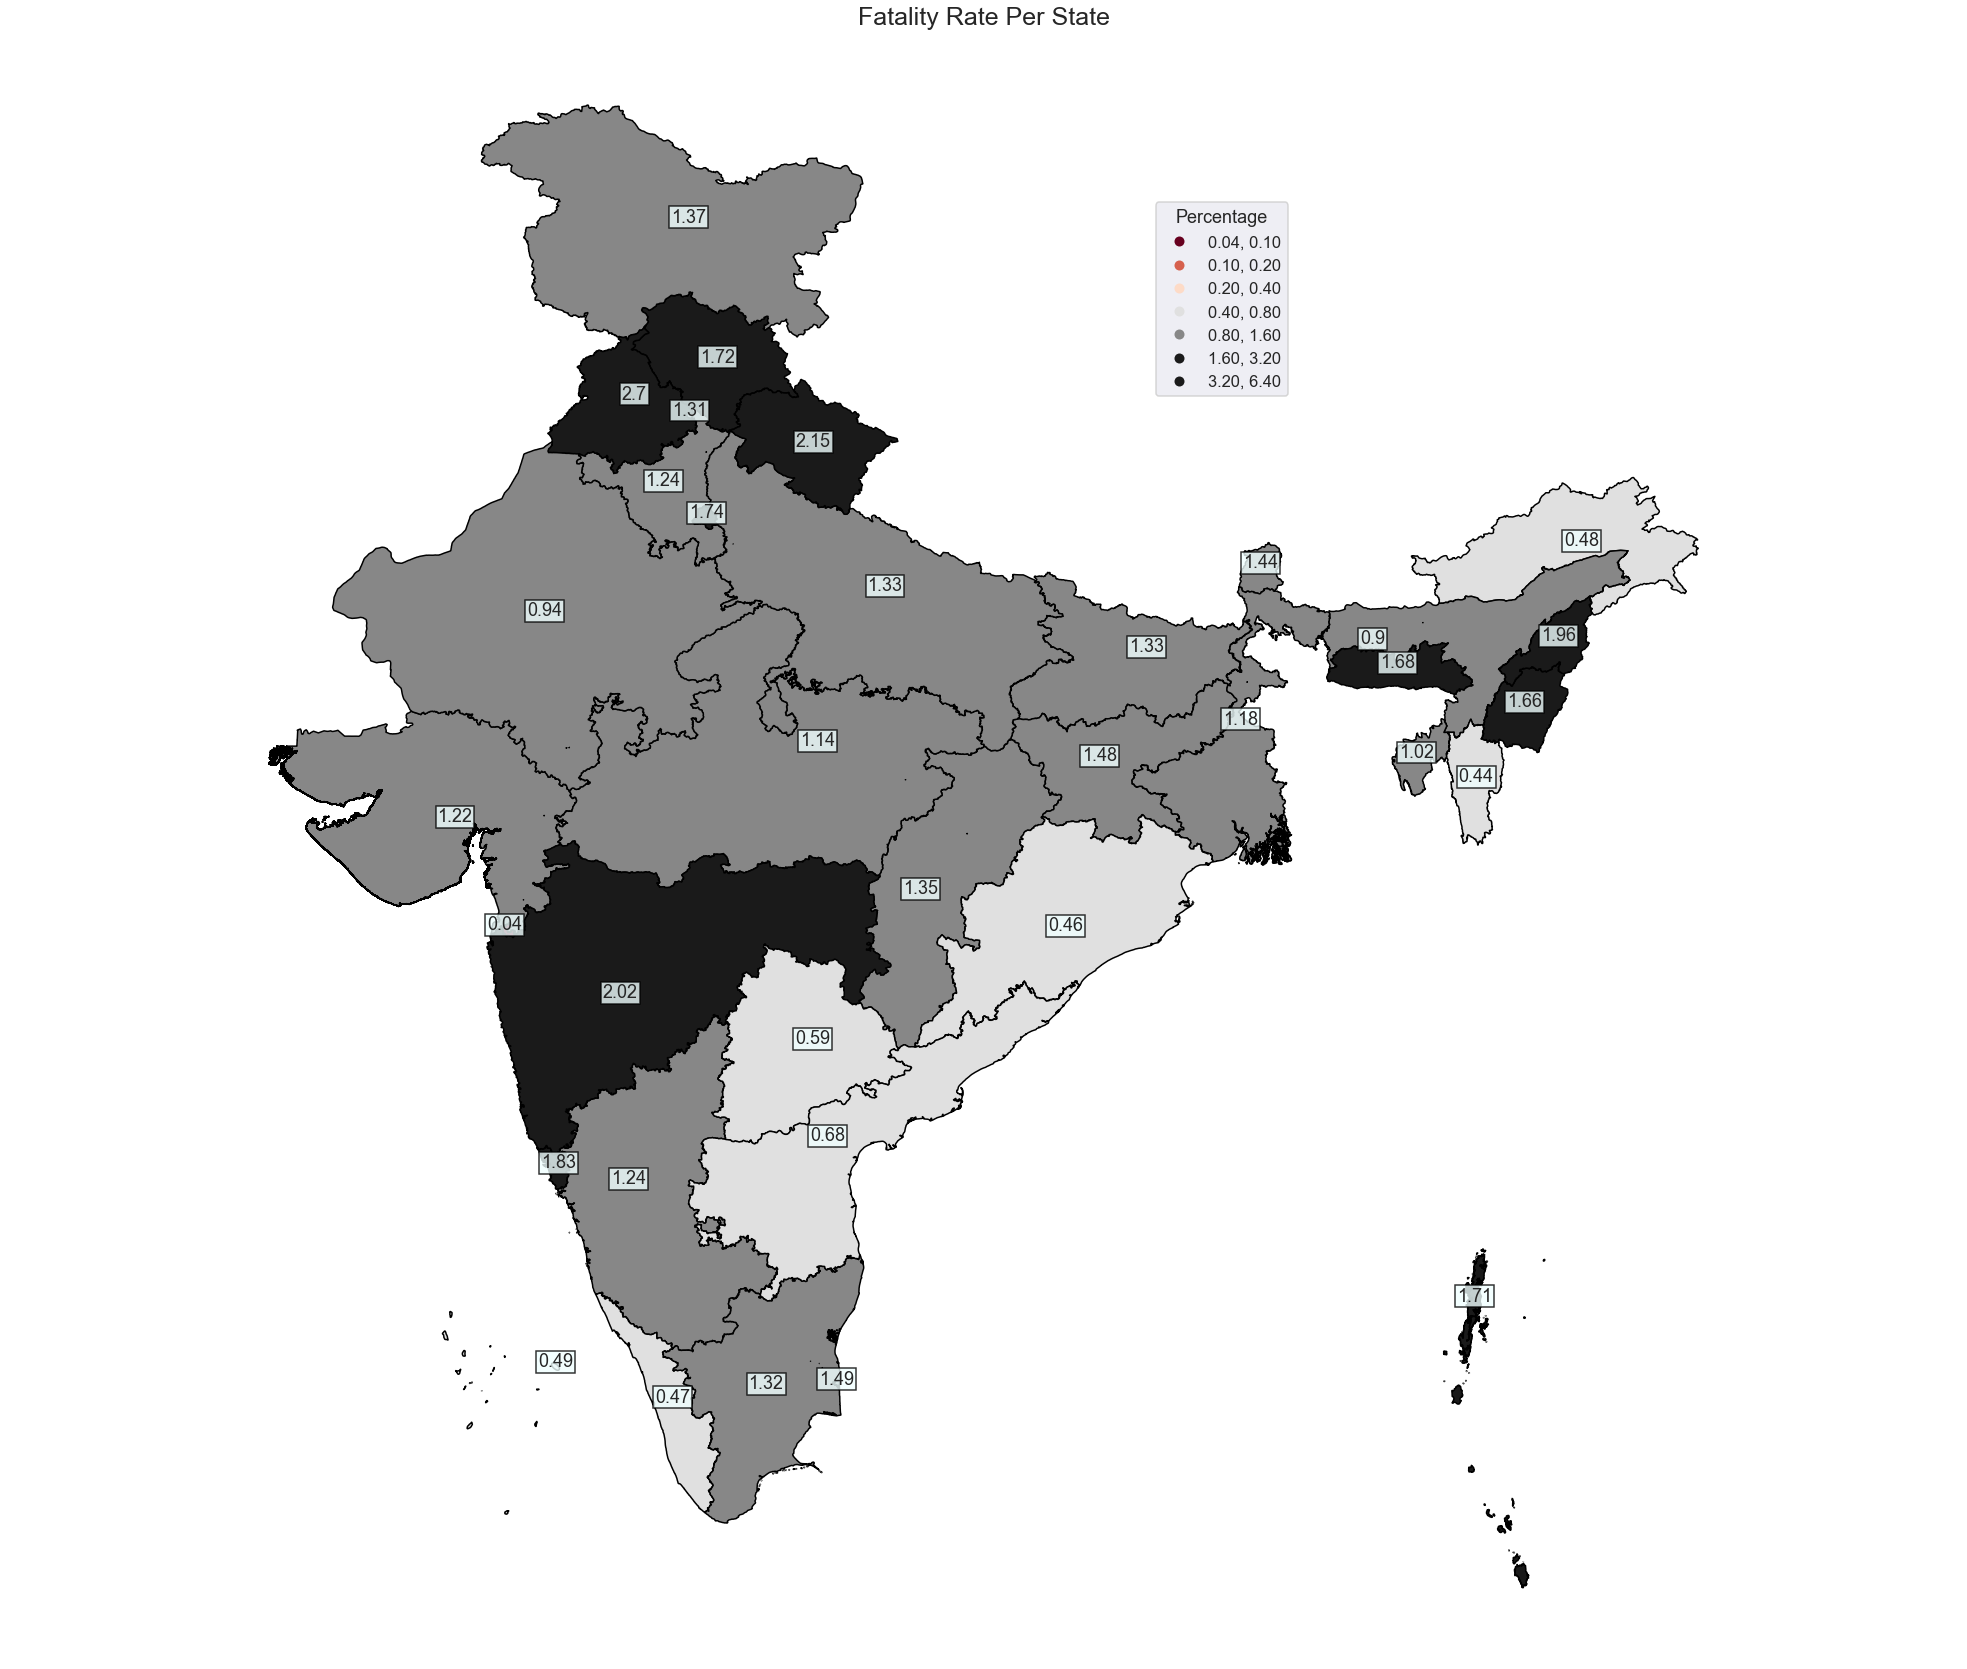

In [12]:
merged['dcratio'] = merged['deaths'] / merged['confirmed'] * 100
merged.dcratio = merged.dcratio.round(2)



sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'RdGy'
figsize = (35, 30)
ax = merged.dropna().plot(column= 'dcratio', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[0.1 , 0.2 , 0.4 , 0.8 , 1.6 , 3.2 , 6.4]),
                          
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['dcratio'], 
           horizontalalignment='center', bbox={'facecolor': 'azure', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Percentage')
ax.set_title("Fatality Rate Per State", size = 25)

#a = ax.text(61, 35, 'Total Death/Confirmed \n percentage \n 3.05',
           # fontsize=25,
           # )
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [13]:
confirmed = merged.sort_values('confirmed', ascending = True)

#lowc = confirmed.head(10)
#highc = confirmed.tail(10)


fig = px.bar(confirmed, x="confirmed", y="state", orientation='h', text = 'confirmed')
fig.update_layout(
    title_text='<b>Confirmed cases of Covid-19 per State <b>',
    title_x=0.5,
    paper_bgcolor='white',
    plot_bgcolor = "white",
    autosize=False,
    width= 1100,
    height=1000)
fig.update_traces(marker_color='brown')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [14]:
#import plotly.io as pio
#pio.write_html(fig, file='index.html', auto_open=True)

In [15]:
deaths = merged.sort_values('deaths', ascending = True)
deaths = deaths[deaths.deaths > 0 ]
lowd = deaths.head(10)
highd = deaths.tail(10)
fig = px.bar(deaths, x="deaths", y="state", orientation='h', text = 'deaths')
fig.update_layout(
    title_text='<b>Deaths due to covid 19<b>',
    title_x=0.5,
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor = "rgb(255,255,255)",
    autosize=False,
    width= 1100,
    height=1000)
fig.update_traces(marker_color='red')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='darkblue', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='darkblue', size=14))
fig.show()

In [16]:
recovered = merged.sort_values('cured', ascending = True)
highr = recovered.head(10)
lowr = recovered.tail(10)

fig = px.bar(recovered, x="cured", y="state", orientation='h', text = 'cured')
fig.update_layout(
    title_text='<b> Recovered cases of covid 19 per State<b>',
    title_x=0.5,
    paper_bgcolor='white',
    plot_bgcolor = "white",
    autosize=False,
    width= 1100,
    height=1000)
fig.update_traces(marker_color='green')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [17]:
merged = merged[merged.dcratio > 0.0]
merged = merged.sort_values('dcratio', ascending = True)
fig = px.bar(merged, x="dcratio", y="state", orientation='h', text = 'dcratio')
fig.update_layout(
    title_text='<b>Fatality Rate per State<b>',
    title_x=0.5,
    paper_bgcolor='white',
    plot_bgcolor = "white",
    autosize=False,
    width= 1100,
    height=1000)
fig.update_traces(marker_color='red')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [18]:
#making columns for daily new cases
df2 = df.groupby(['date'])['confirmed', 'deaths','cured',].sum().reset_index()
df2['new_confirmed'] = df2.confirmed.diff()
df2['new_deaths'] = df2.deaths.diff()
df2['new_cured'] = df2.cured.diff()


#taking dates from 15th March
df2 = df2.iloc[44:]

In [19]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.cured, name='Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.deaths, name='Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.confirmed, name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid 19 Total cases in India (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='white',
                 plot_bgcolor = "white",)
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

Daily New Cases of Covid-19

In [20]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.new_cured, name='Daily Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_deaths, name='Daily Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_confirmed, name='Daily Confirmed'))
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Daily Cases (since 15 March)<b>',
                  title_x=0.5,legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
                  
)
fig.show()

In [21]:
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x= df2.date, y= df2.new_deaths,marker_color='red')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))


fig.update_layout(
    title_text='<b>Daily New Deaths (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
    
)

fig.show()

In [22]:
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x= df2.date, y= df2.new_confirmed,marker_color='brown')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))


fig.update_layout(
    title_text='<b>Daily New Confirmed Cases <b>',
                  title_x=0.5,
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
)

fig.show()

In [23]:
fig = go.Figure([go.Bar(x= df2.date, y= df2.new_cured,marker_color='green')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.update_layout(
    title_text='<b>Daily New Recovered Cases (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
    )

fig.show()